# Лабораторная работа №2: "Обработка признаков (часть 1)."

## ИУ5-23 Зорин Арсений

**Задание:**
- Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных;
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  - устранение пропусков в данных;
  - кодирование категориальных признаков;
  - нормализацию числовых признаков.

In [435]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from category_encoders.count import CountEncoder as ce_CountEncoder
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_palette('husl')

data = pd.read_csv('../datasets/spotify/RU.csv').explode('artists')

In [436]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [437]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [438]:
data['release_year'] = pd.to_datetime(data.release_date, format='%Y-%m-%d', errors='ignore').dt.year
data['artists'] = data['artists'].apply(eval)
data = data.explode('artists')

In [439]:
data.isnull().sum()

id                  0
name                1
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
release_year        0
dtype: int64

В используемых данных отстутствуют пропуски. Однако в образовательных целях удалим 10% значений из столбца с валентностью (valence).

In [440]:
mask = np.random.choice([True, False], size=data['valence'].size, p=[0.1,0.9])
modified = data.copy()
modified['valence'] = modified['valence'].mask(mask)

In [441]:
modified.isnull().sum()

id                      0
name                    1
popularity              0
duration_ms             0
explicit                0
artists                 0
id_artists              0
release_date            0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence             12475
tempo                   0
time_signature          0
release_year            0
dtype: int64

In [442]:
modified['valence'] = modified['valence'].fillna(modified['valence'].median())
modified.isnull().sum()

id                  0
name                1
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
release_year        0
dtype: int64

(array([[10003., 12393., 12469., 13720., 13119., 14947., 14074., 13542.,
         11919.,  9131.],
        [ 9064., 11144., 11241., 12353., 11762., 25969., 12647., 12228.,
         10676.,  8233.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

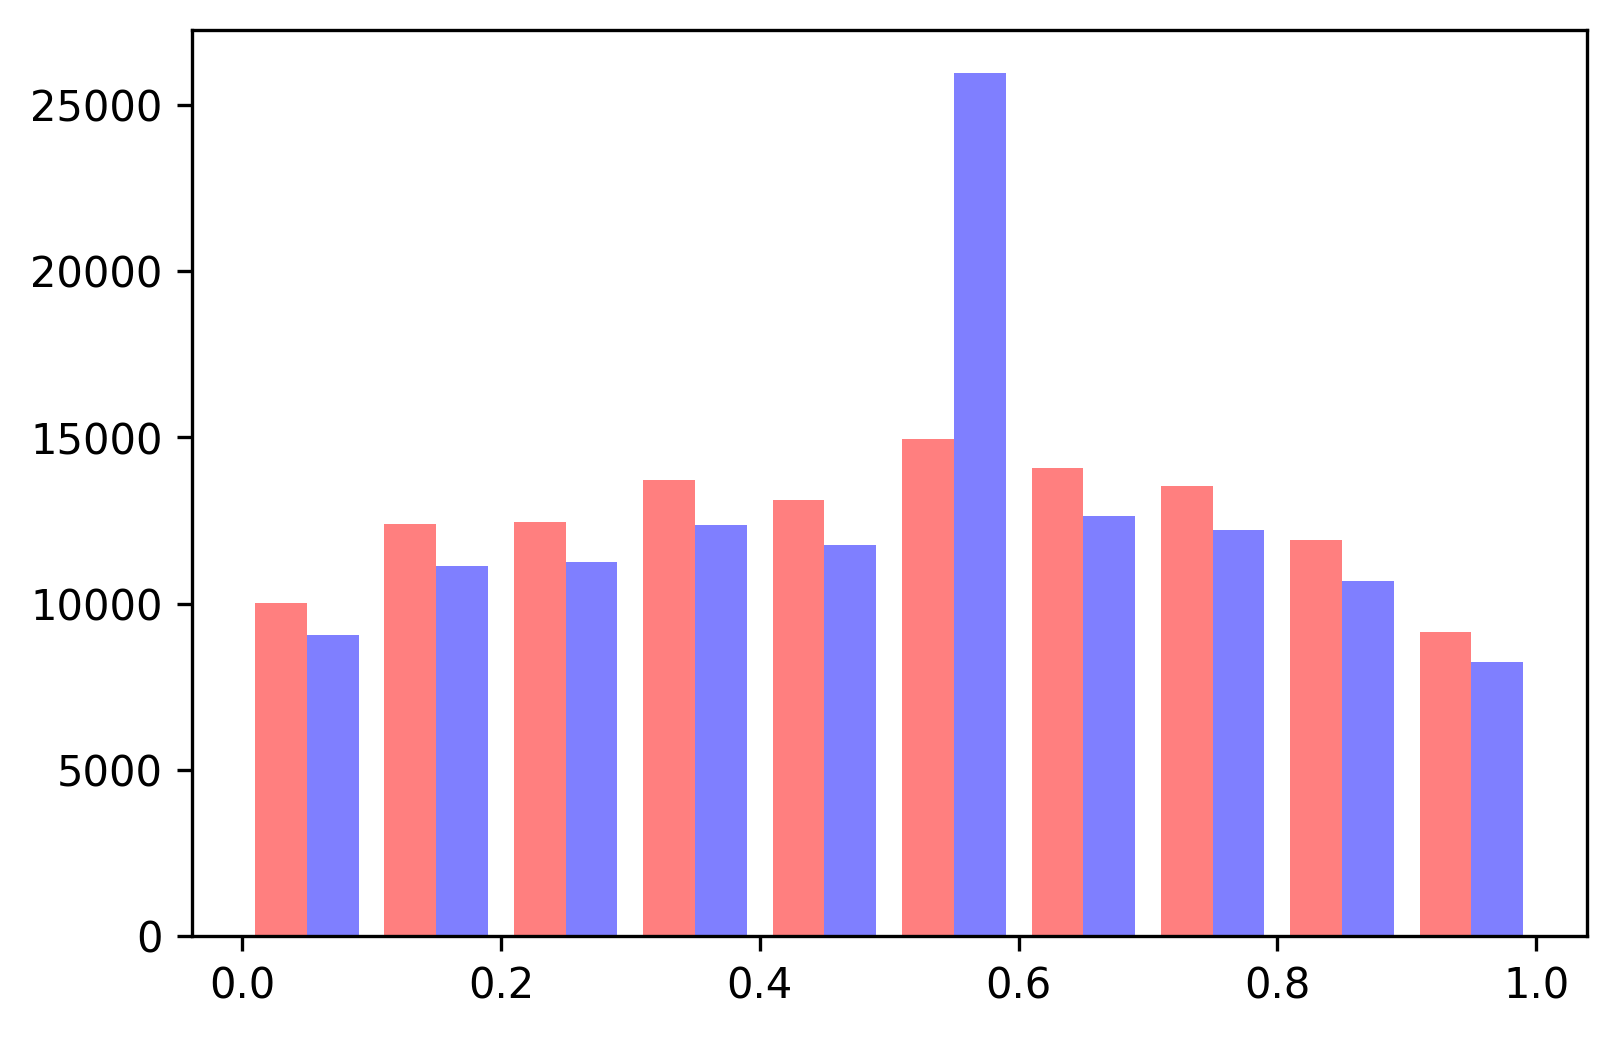

In [443]:
# fig, ax = plt.subplots()
# sns.displot(data, x="valence", label="real", kind="kde", ax=ax)
# sns.displot(modified, x="valence", label="filled_with_median", kind="kde", ax=ax)
plt.hist([data['valence'], modified['valence']], color=['r','b'], alpha=0.5)

Нормализуем параметры композиции

Удалим строки содержащие 0.

In [444]:
data[data.isin([0])].count() / data.size * 100

id                  0.000000
name                0.000000
popularity          1.257307
duration_ms         0.000000
explicit            4.516052
artists             0.000000
id_artists          0.000000
release_date        0.000000
danceability        0.004218
energy              0.000646
key                 0.577203
loudness            0.000000
mode                1.608226
speechiness         0.004218
acousticness        0.001102
instrumentalness    1.051847
liveness            0.000912
valence             0.005130
tempo               0.004218
time_signature      0.004218
release_year        0.000000
dtype: float64

In [445]:
num_cols = ['acousticness', 'danceability', 'energy', 'duration_ms', 'instrumentalness', 'valence', 
            'popularity', 'tempo', 'liveness', 'loudness', 'speechiness']
data = data[(data[num_cols] != 0).all(axis=1)]

Нормализуем числовые признаки.

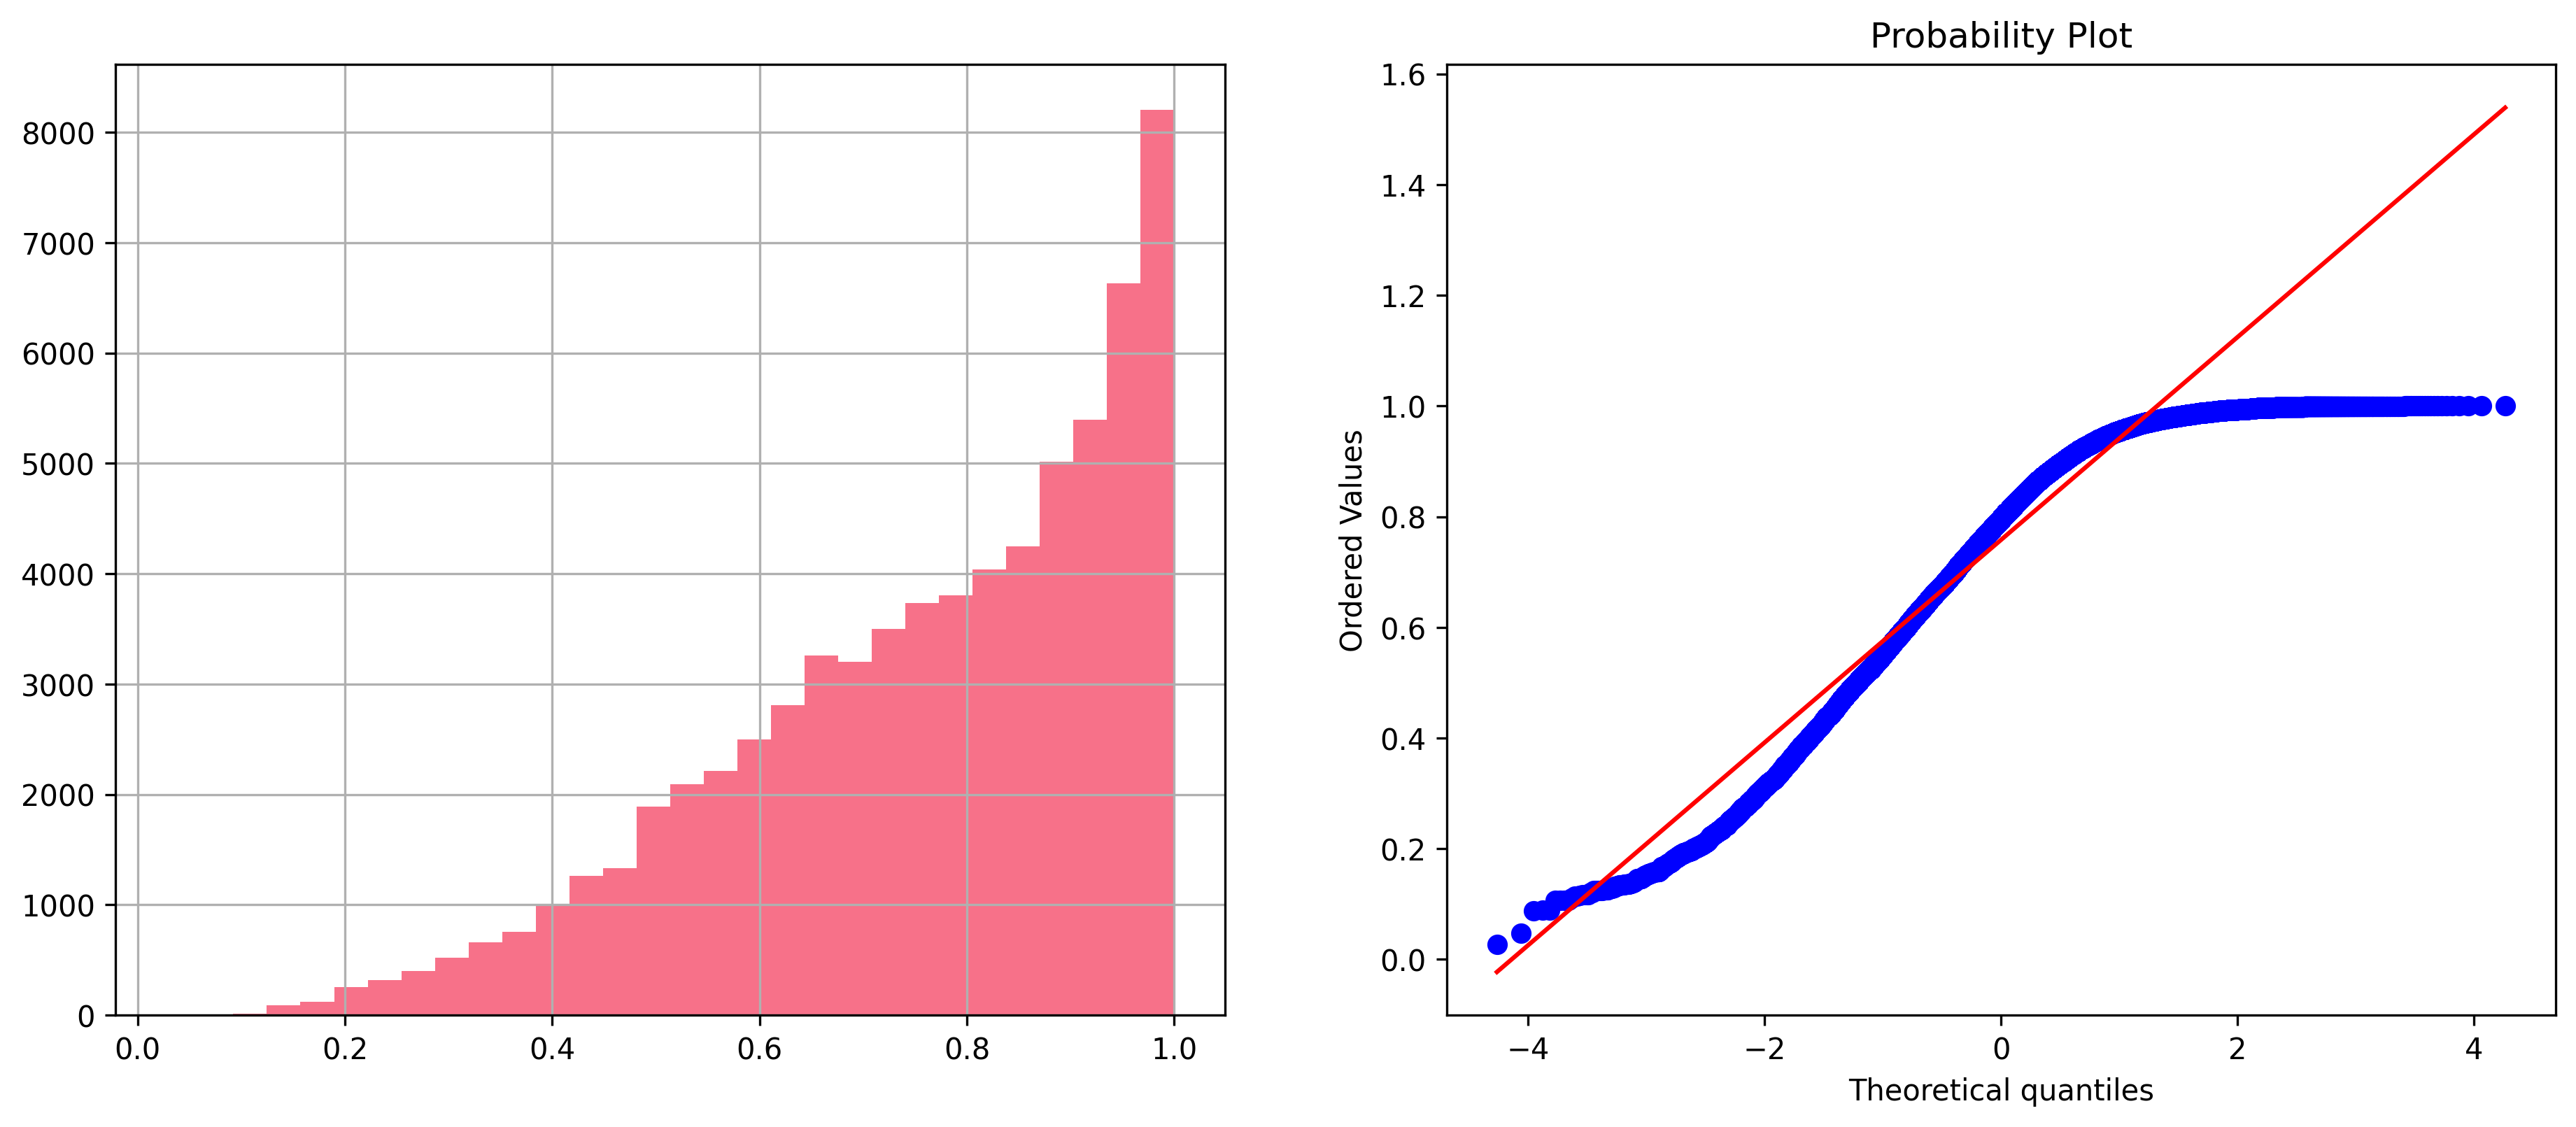

In [446]:
data['energy']= data['energy'] ** 0.333
diagnostic_plots(data, 'energy')

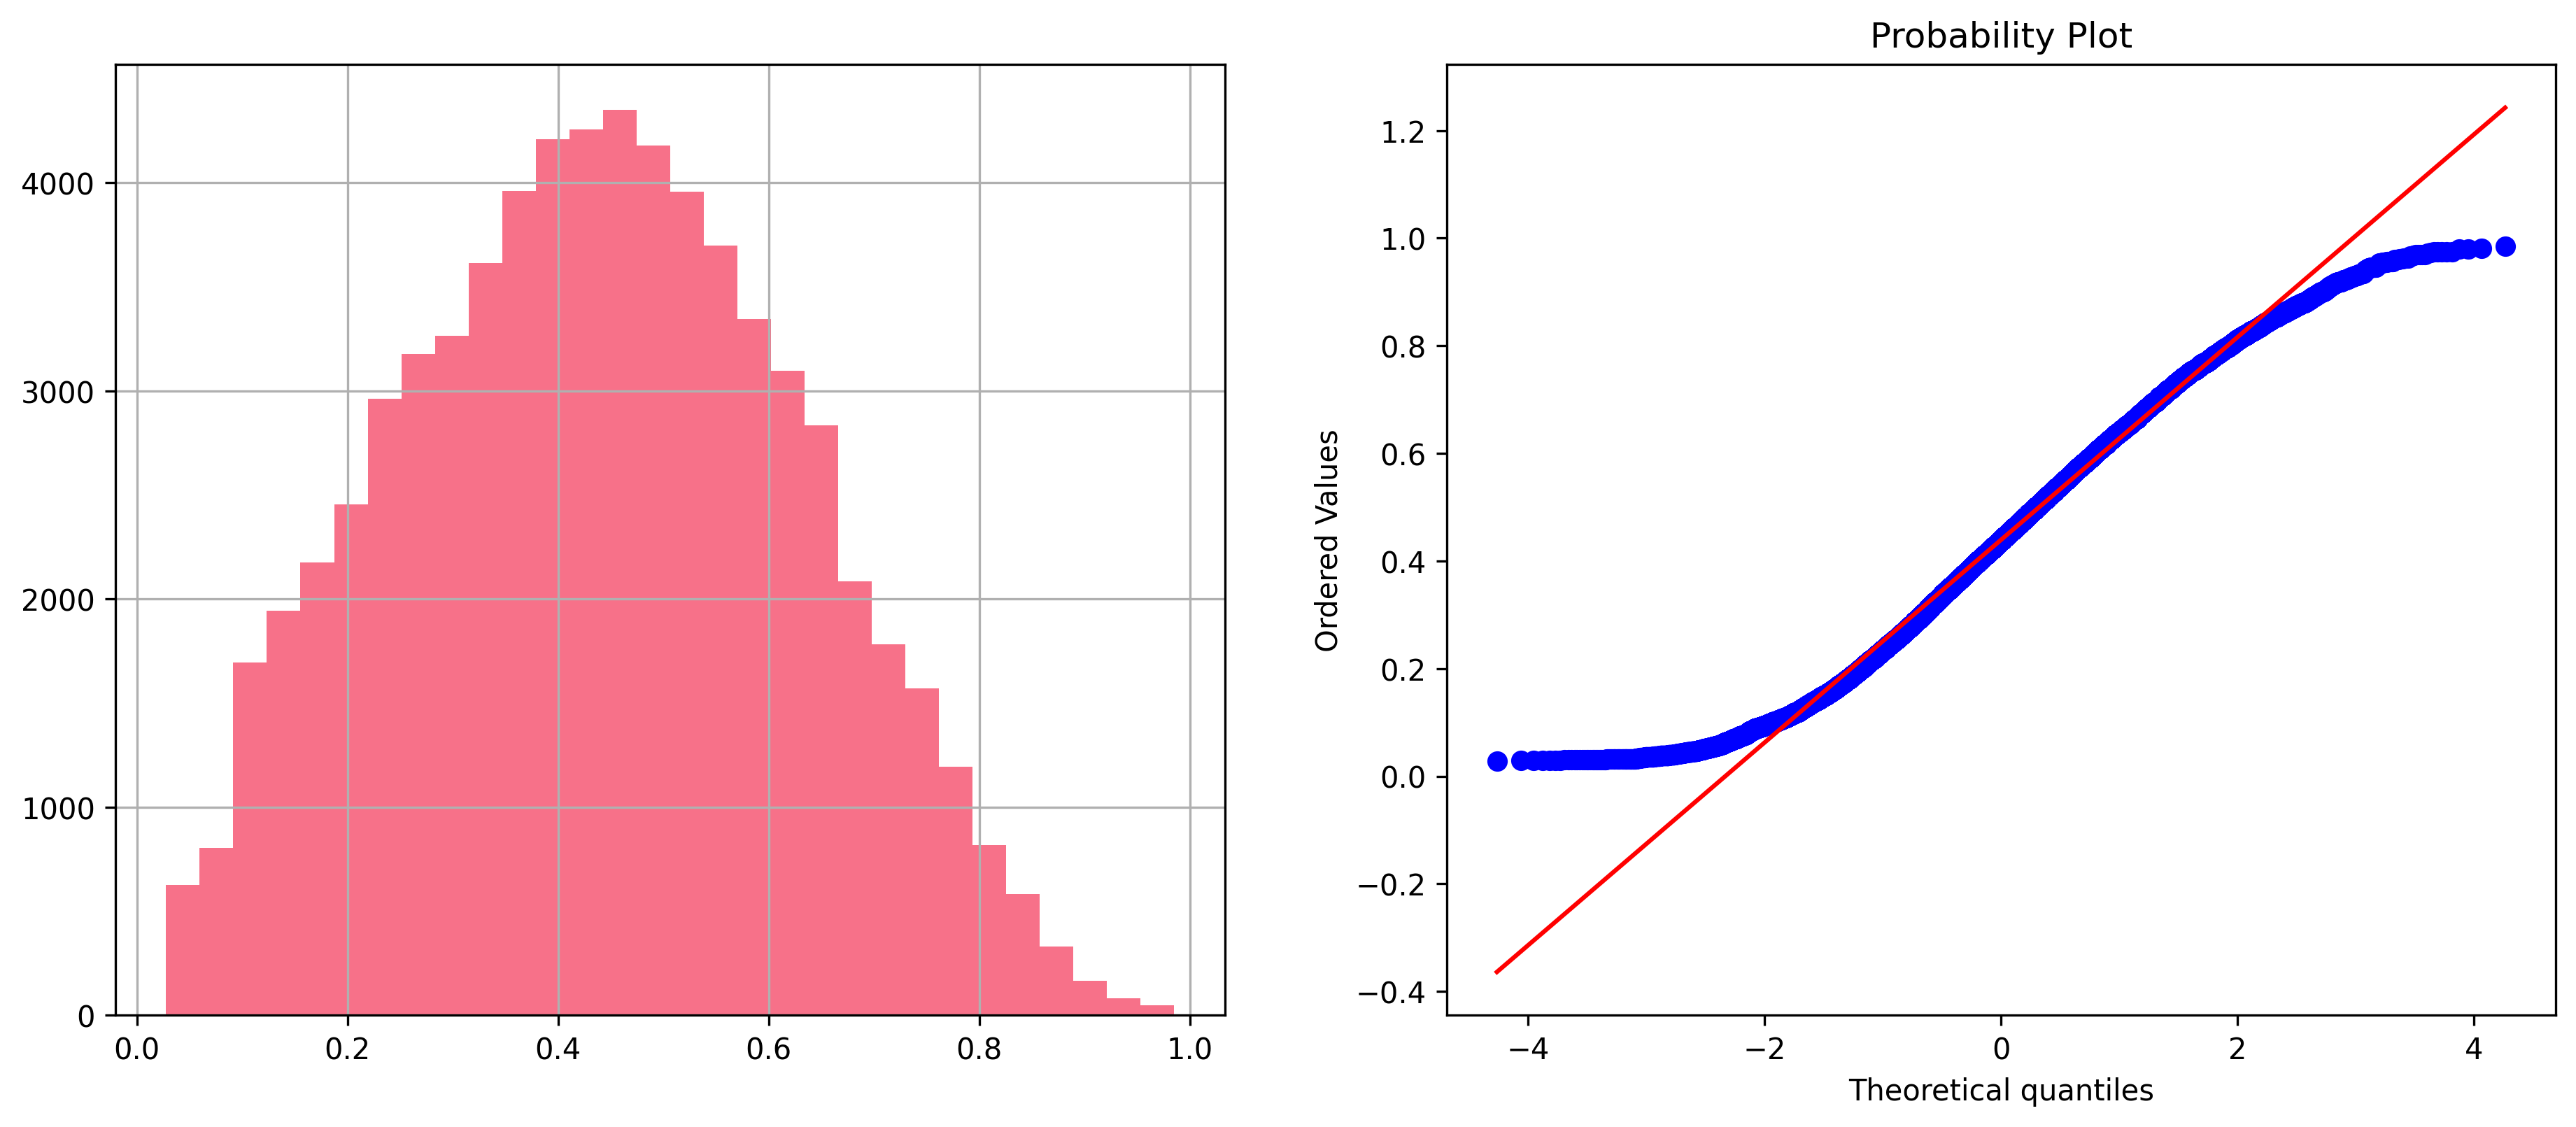

In [447]:
data['danceability'] = data['danceability'] ** 1.25
diagnostic_plots(data, 'danceability')

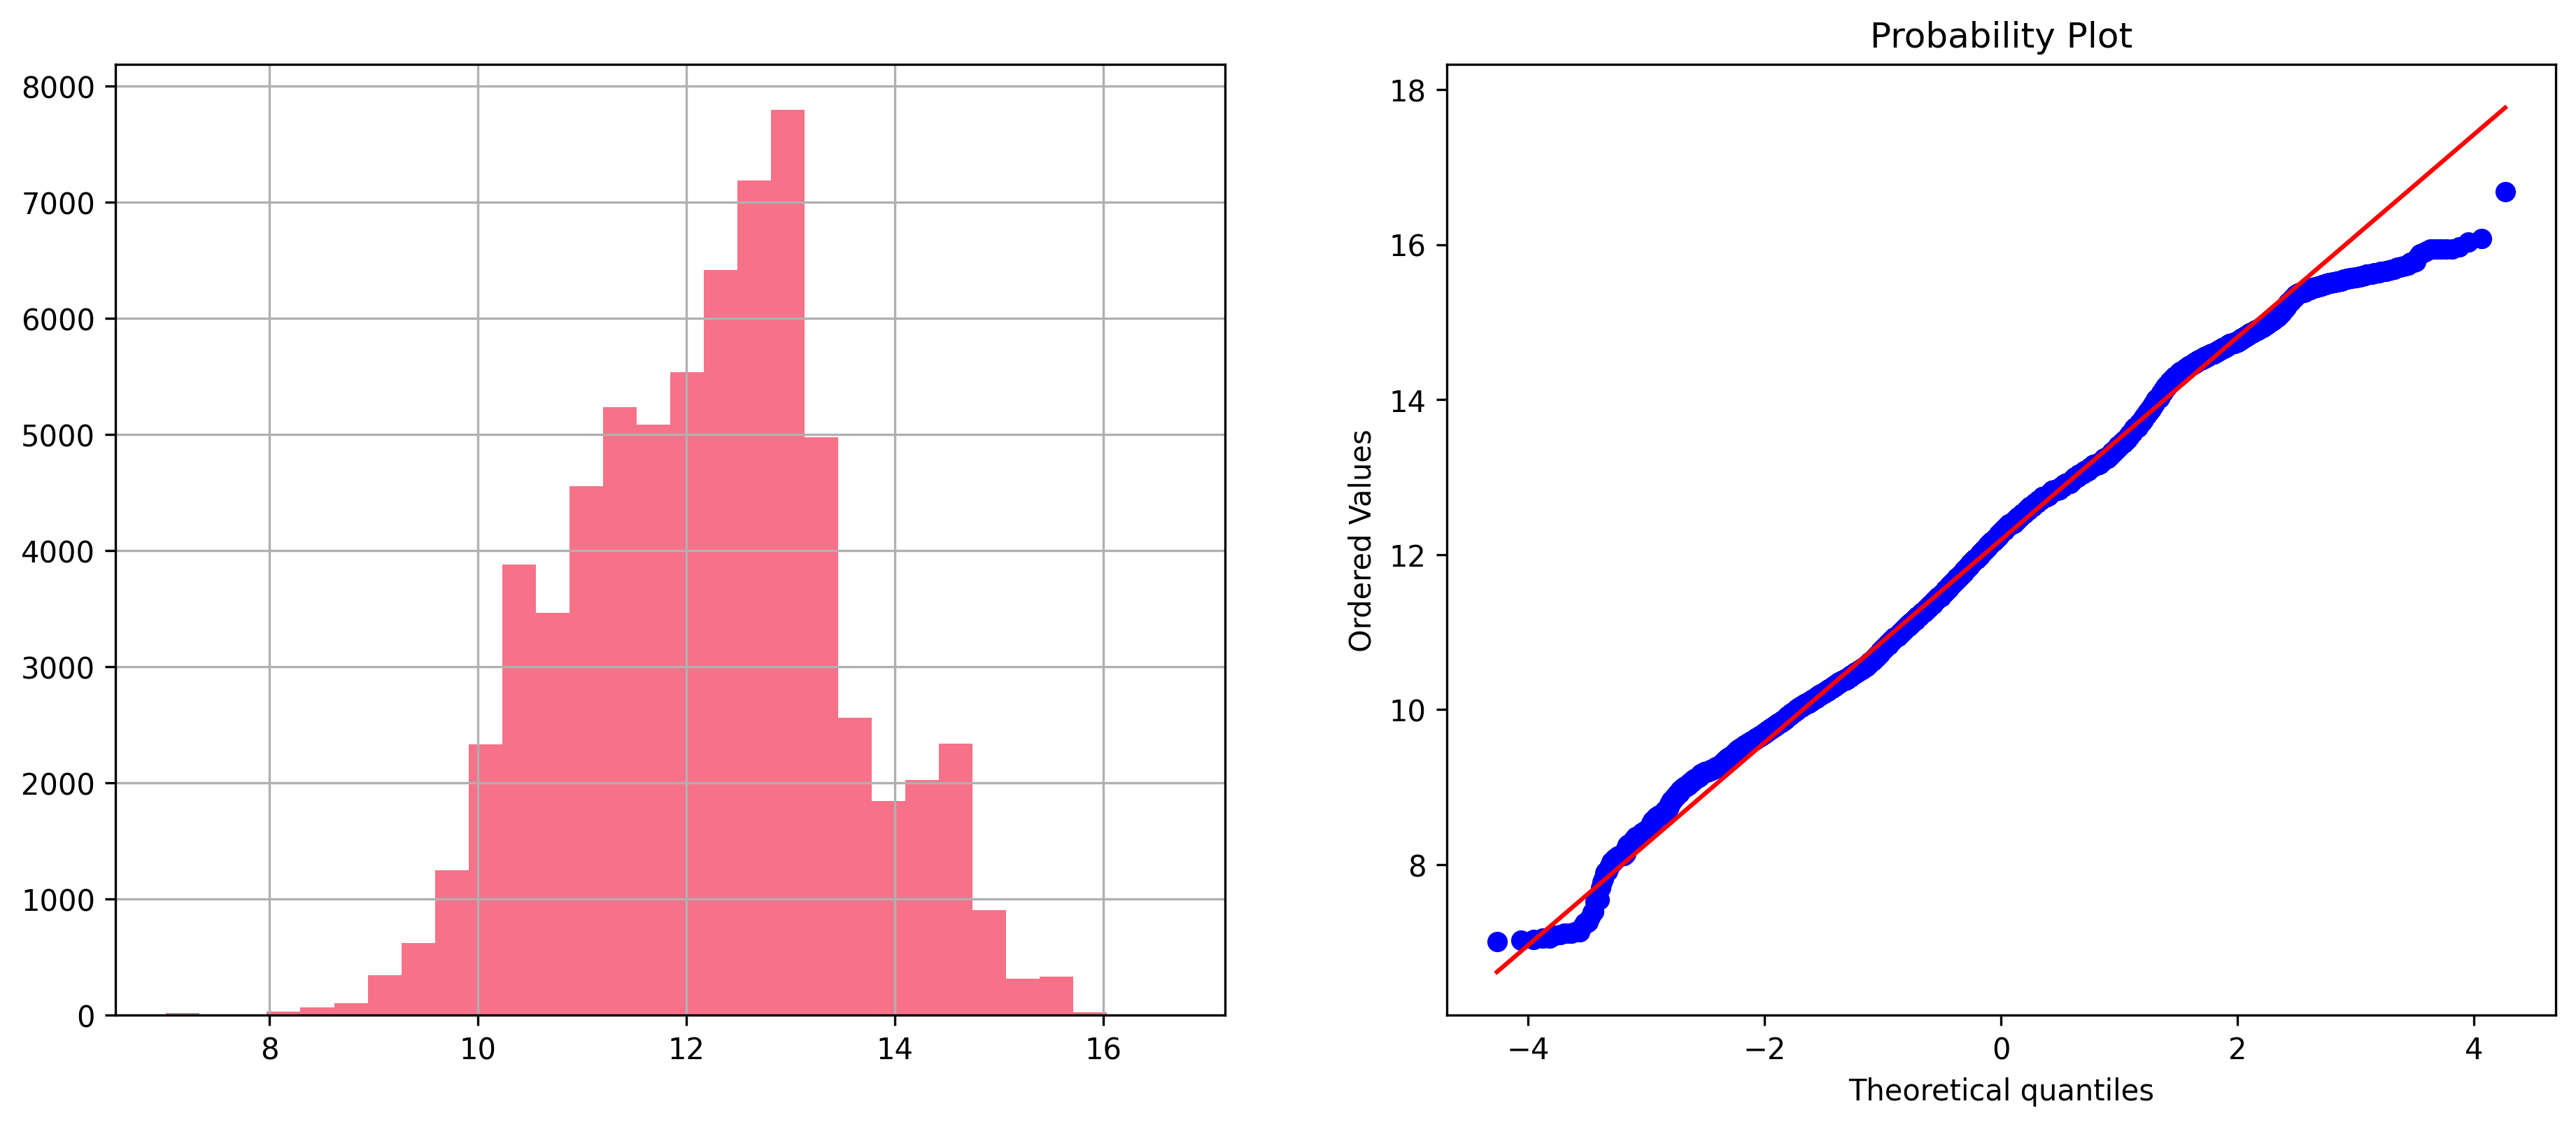

In [448]:
data['tempo'], _ = stats.boxcox(data['tempo'])
diagnostic_plots(data, 'tempo')

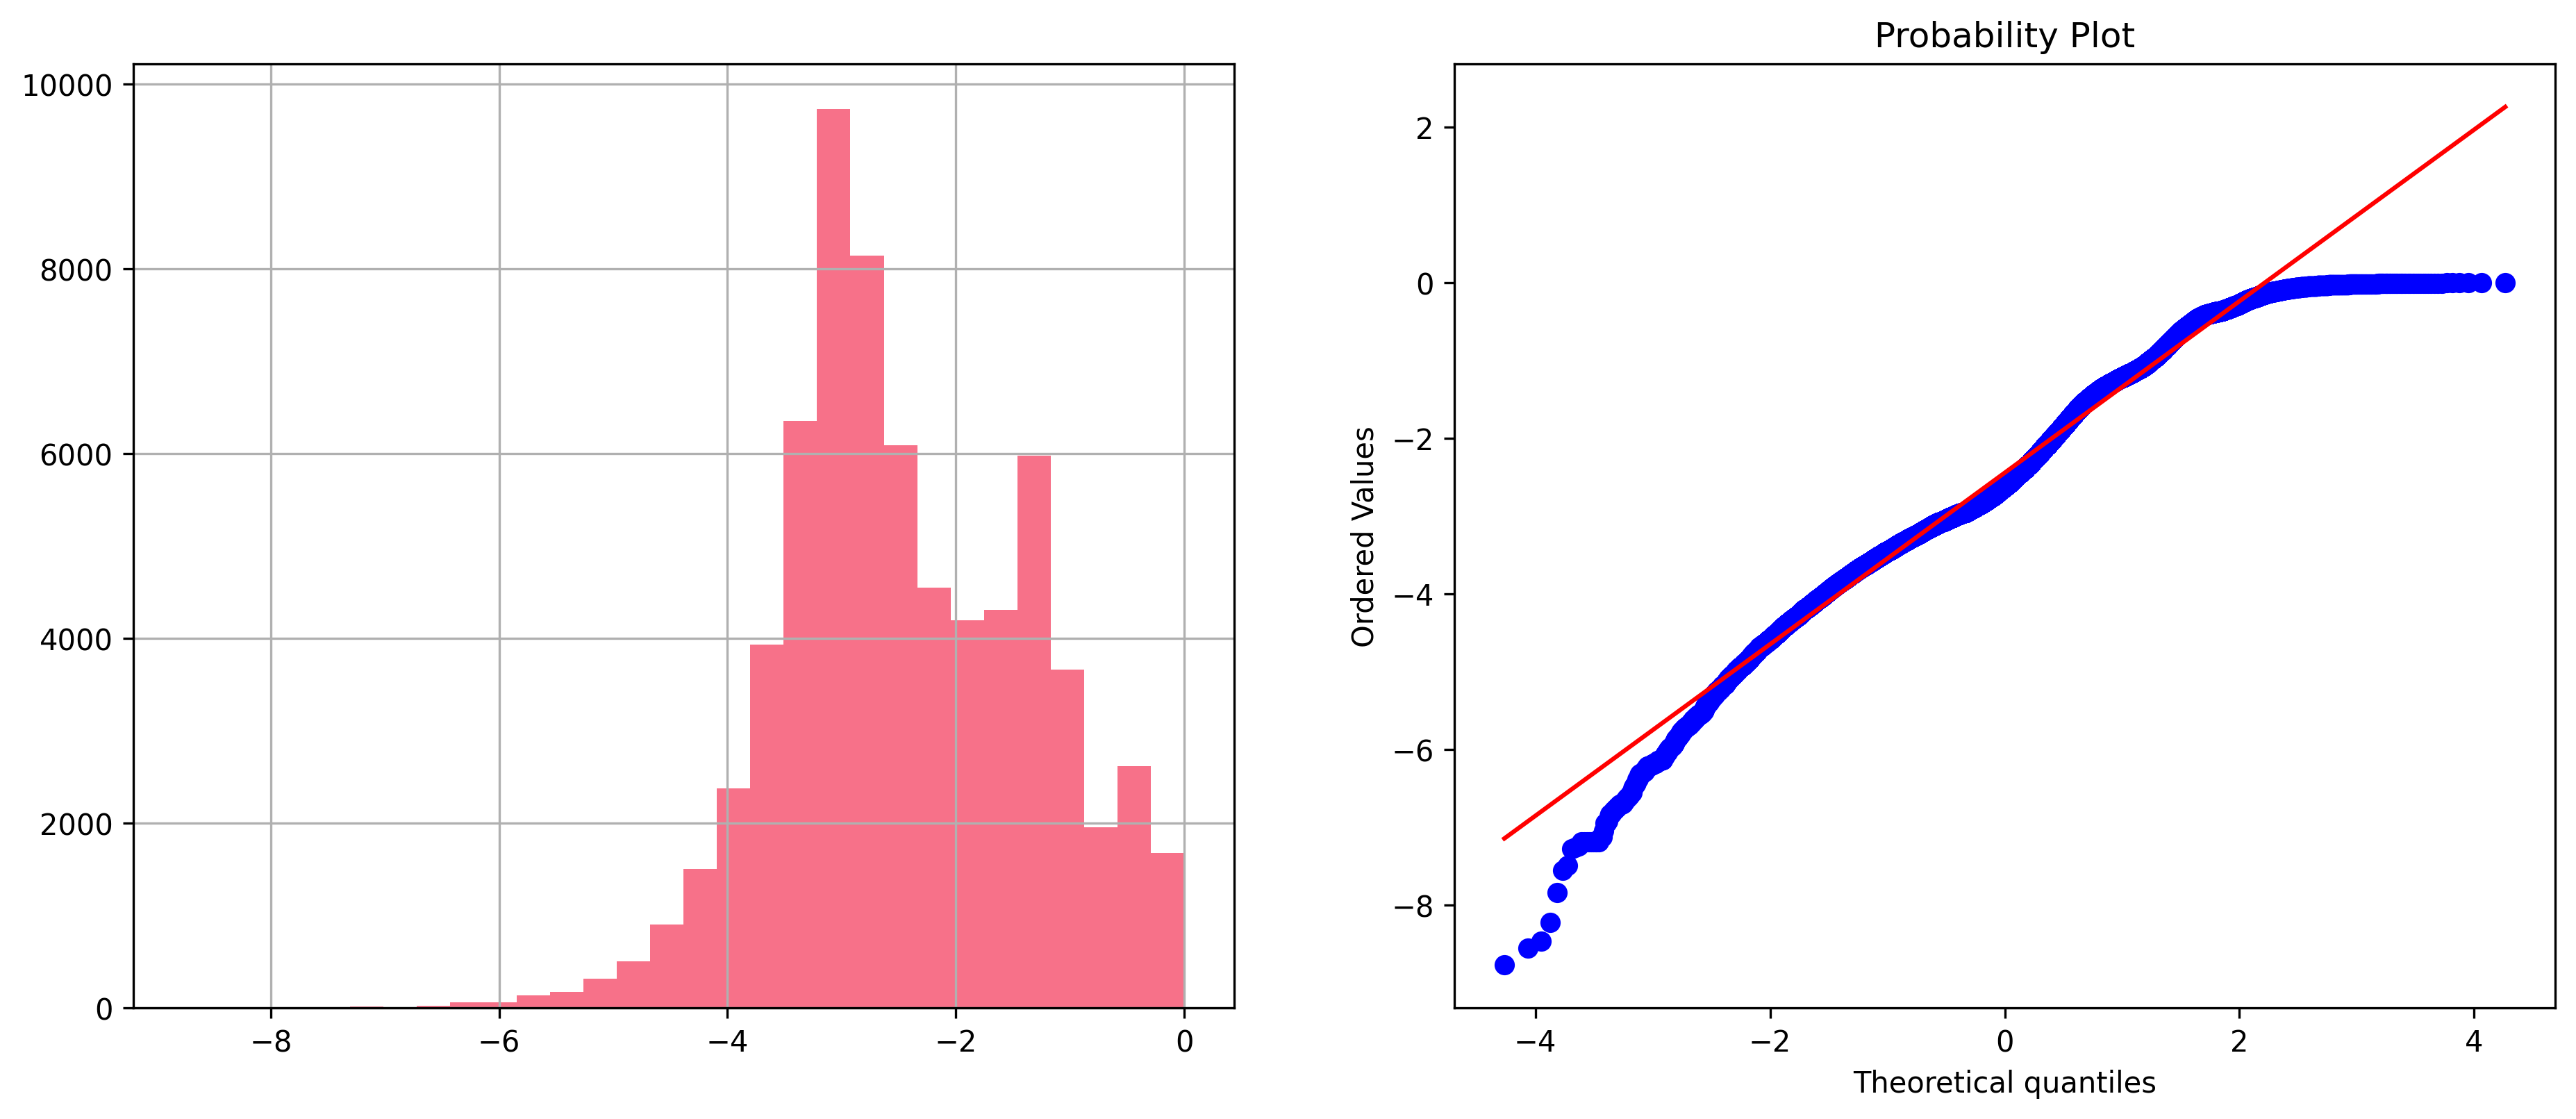

In [449]:
data['liveness'], _ = stats.boxcox(data['liveness'])
diagnostic_plots(data, 'liveness')

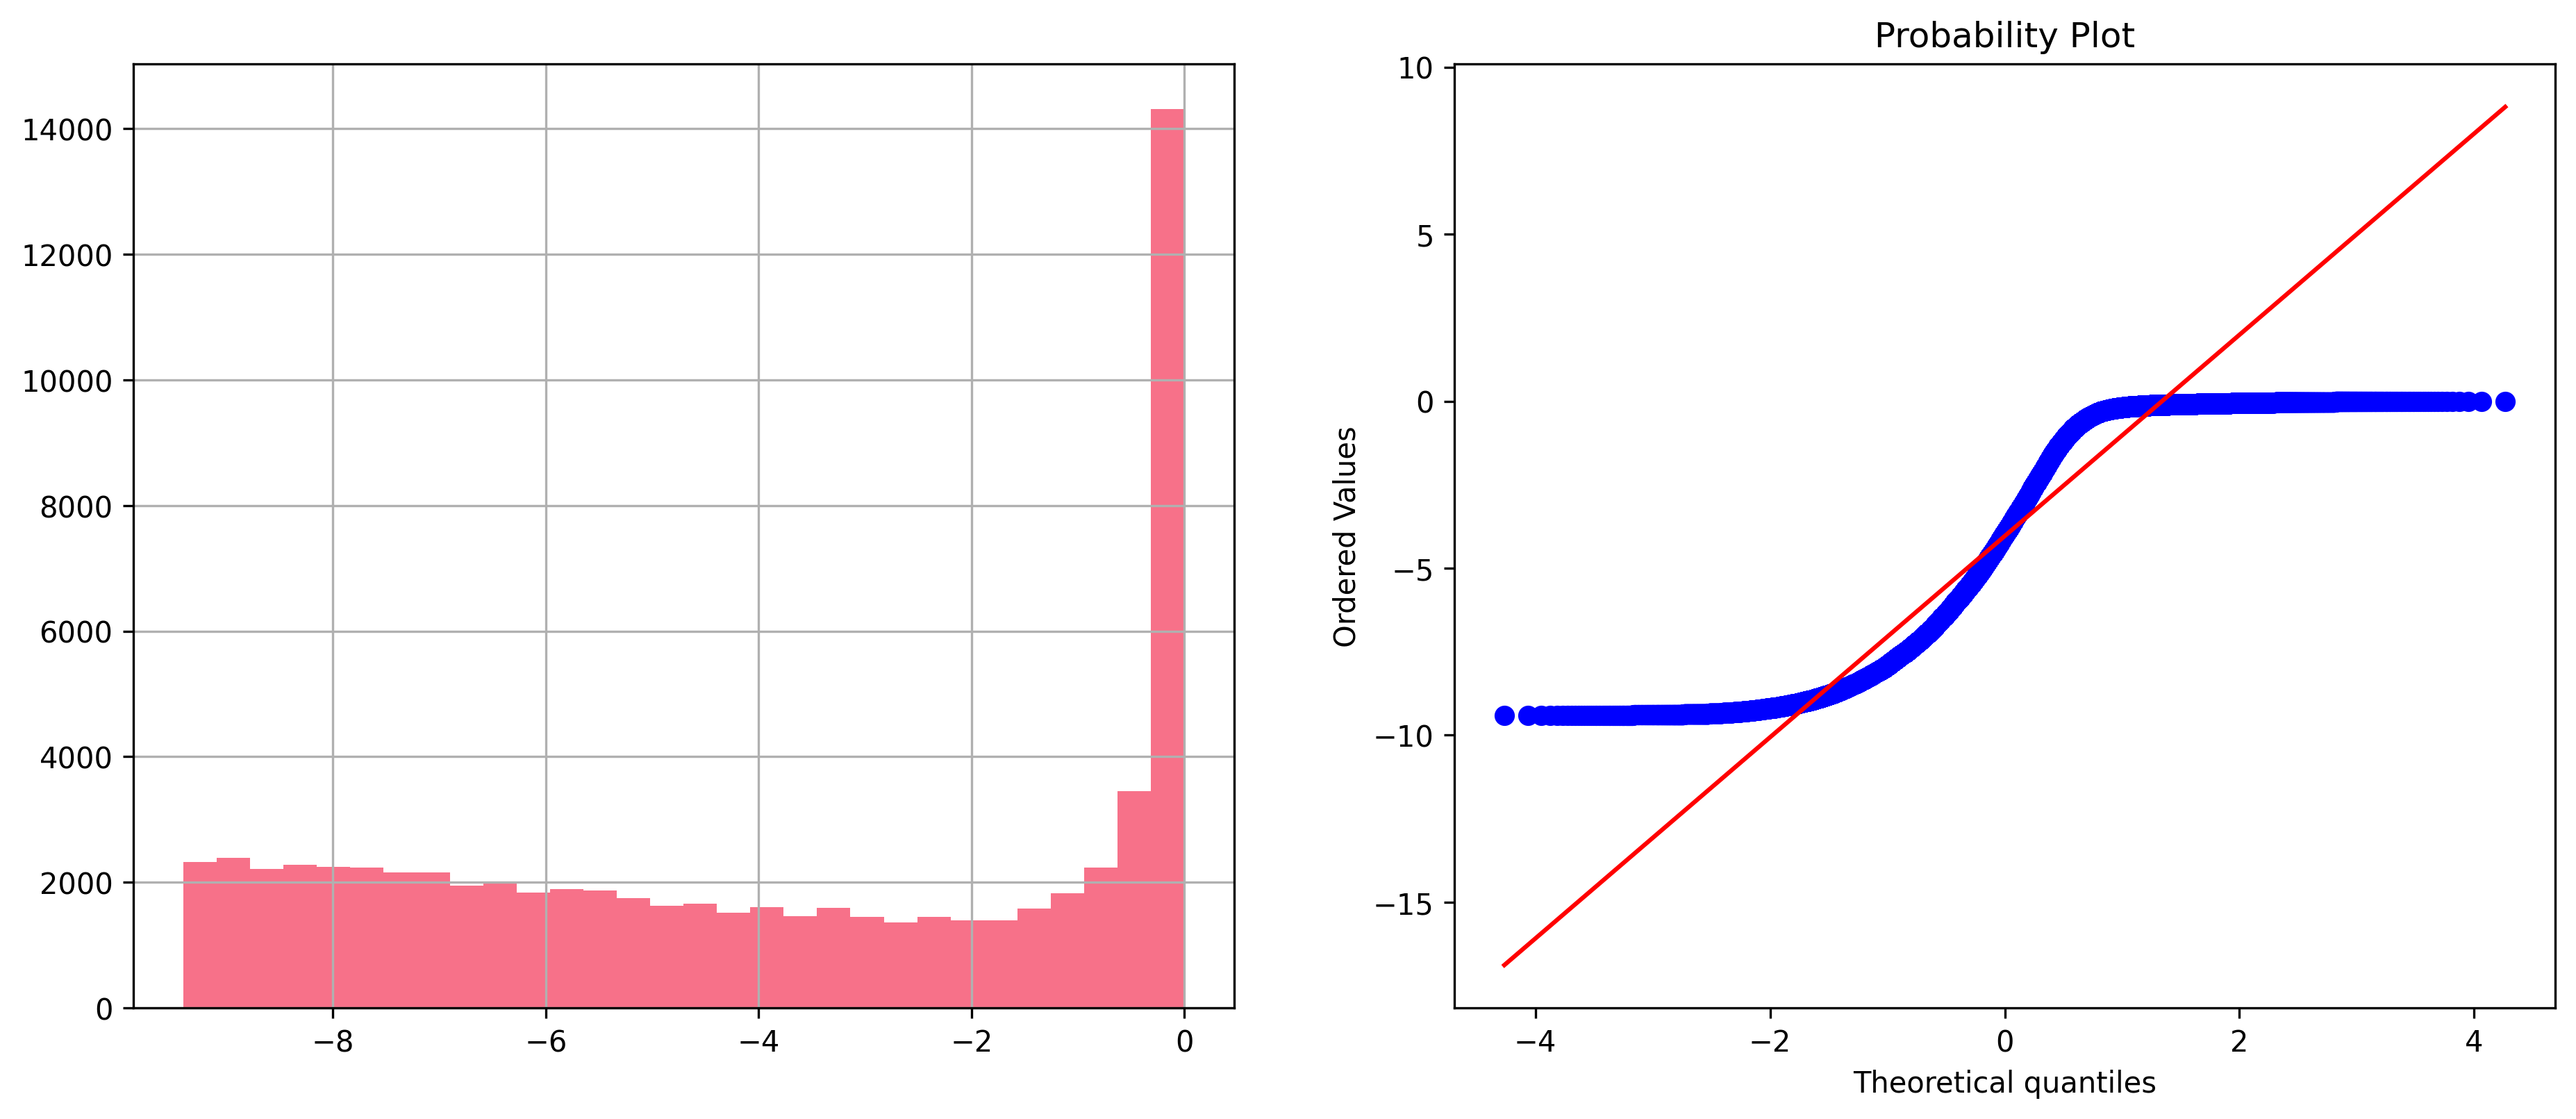

In [450]:
data['instrumentalness'], _ = stats.boxcox(data['instrumentalness'])
diagnostic_plots(data, 'instrumentalness')

<AxesSubplot:>

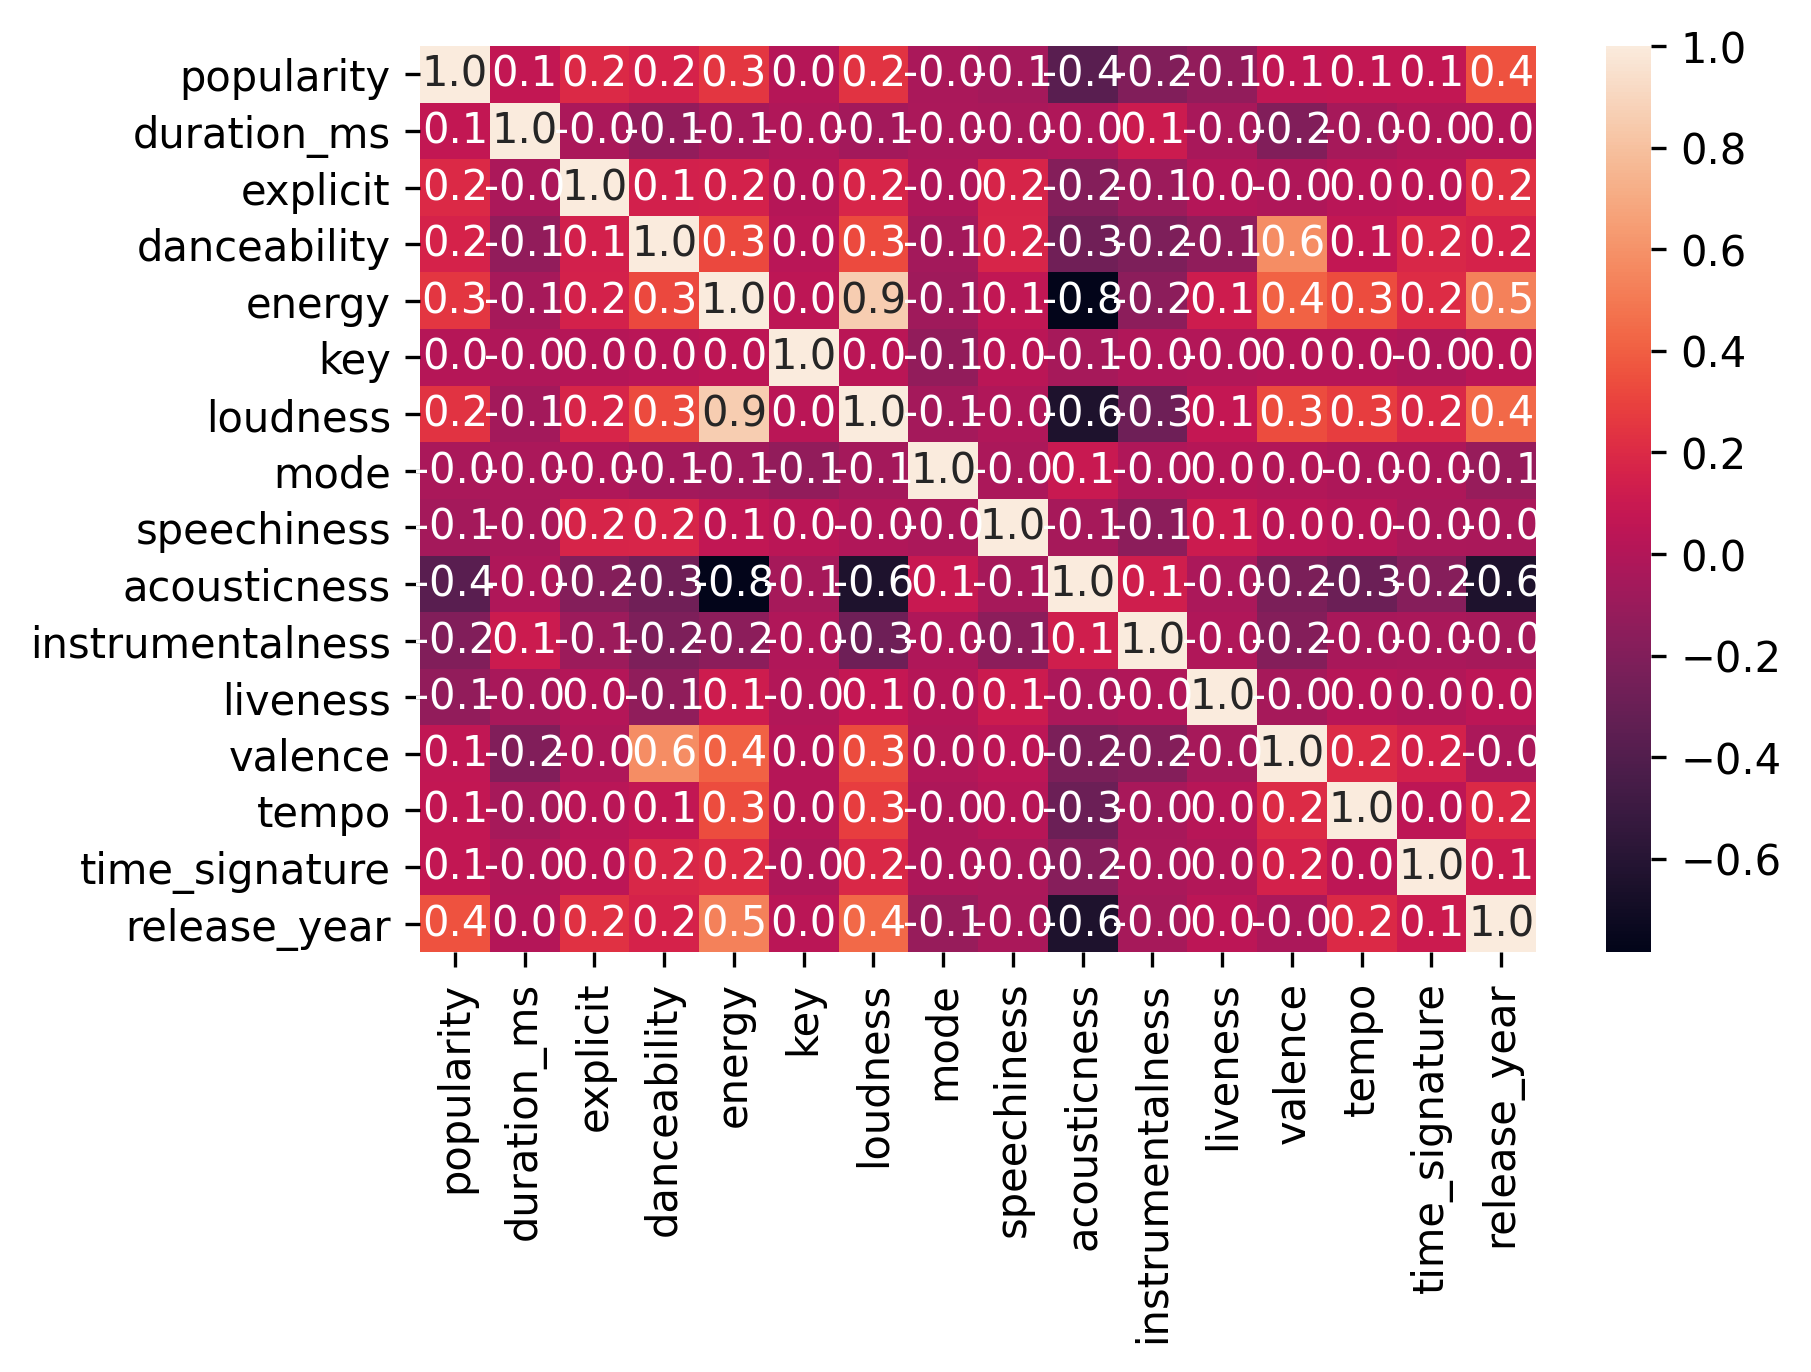

In [451]:
sns.heatmap(data.corr(), annot=True, fmt='.1f')

In [452]:
data = data.drop(['duration_ms', 'mode', 'speechiness', 'valence', 'tempo', 
                  'time_signature', 'key', 'liveness', 'loudness', 'acousticness'], axis=1)

Кодирование категориальных признаков.

In [453]:
data['trend'] = data[['energy', 'danceability', 'instrumentalness']].idxmax(axis=1)
data['trend'] = LabelEncoder().fit_transform(data['trend'])
data.head()

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,instrumentalness,release_year,trend
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.578029,0.763667,-0.293119,1922,1
13,0QiT0Oo5QdLXdFw6RDOj7h,Tu Verras Montmartre,1,0,Lucien Boyer,['4mSouLpNSEY1d7OdIjlFiP'],1922,0.643716,0.654491,-7.301253,1922,1
26,112adU33vo4C1eRZct2hWy,Nuits De Chine,4,0,Louis Lynel,['28pbIiOohRRZjqpAM9iqYM'],1922,0.338113,0.660660,-6.629875,1922,1
149,2wAfHM7Whz67VFbdanhZlk,Nobody Knows You When You're Down and Out,41,0,Bessie Smith,['5ESobCkc6JI4tIMxQttqeg'],1923,0.543514,0.348796,-4.925375,1923,0
150,7lRFR5GJCxK87ZbVMtQSeS,Ain't Misbehavin',28,0,Louis Armstrong,['19eLuQmk9aCobbVDHc6eek'],1923,0.600519,0.633592,-5.135452,1923,1
